In [1]:
import numpy as np

# 90-degree rotation matrix for 2D space
theta = np.pi / 2  # 90 degrees in radians
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
point = np.array([1, 0])

# Apply rotation
rotated_point = np.dot(R, point)

# Round the output to handle small floating-point errors
rotated_point = np.round(rotated_point, decimals=6)
print(rotated_point)

[0. 1.]


In [2]:
# Define translation vector and rotation matrix
translation = np.array([2, 3])
rotation = np.array([[0, -1], [1, 0]])  # 90-degree rotation

# Define a point to transform
point = np.array([1, 0])

# Apply Euclidean transformation: rotation + translation
transformed_point = np.dot(rotation, point) + translation
print(transformed_point)  # Output: [2, 4]

[2 4]


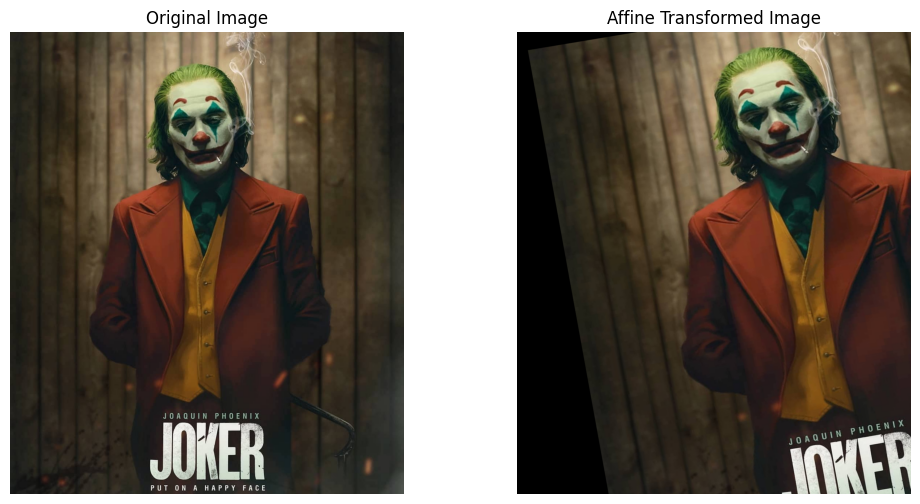

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/[000085].png')

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Define an affine transformation matrix (scaling + rotation)
    M = np.float32([[1.2, 0.2, 30], [-0.2, 1.1, 50]])

    # Apply affine transformation
    transformed_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Convert BGR (OpenCV default) to RGB (for matplotlib)
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed_image_rgb = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)

    # Create a subplot with 1 row and 2 columns to display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 12x6 is the size of the figure

    # Show original image
    axes[0].imshow(original_image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Turn off axis

    # Show transformed image
    axes[1].imshow(transformed_image_rgb)
    axes[1].set_title("Affine Transformed Image")
    axes[1].axis('off')  # Turn off axis

    # Display both images
    plt.show()

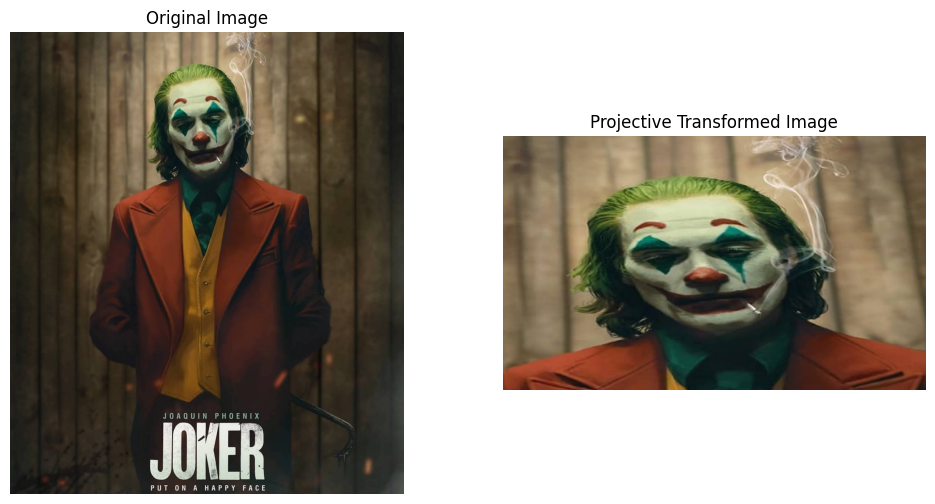

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/[000085].png')

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Define four points in the source image
    pts_src = np.array([[300, 0], [800, 0], [700, 500], [300, 500]])

    # Define corresponding points in the destination image
    pts_dst = np.array([[0, 0], [500, 0], [450, 300], [0, 300]])

    # Compute the projective transformation matrix
    M = cv2.getPerspectiveTransform(pts_src.astype(np.float32), pts_dst.astype(np.float32))

    # Apply projective transformation
    projective_image = cv2.warpPerspective(image, M, (500, 300))

    # Convert BGR (OpenCV default) to RGB (for matplotlib)
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    projective_image_rgb = cv2.cvtColor(projective_image, cv2.COLOR_BGR2RGB)

    # Create a subplot with 1 row and 2 columns to display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 12x6 is the size of the figure

    # Show original image
    axes[0].imshow(original_image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Turn off axis

    # Show projective transformed image
    axes[1].imshow(projective_image_rgb)
    axes[1].set_title("Projective Transformed Image")
    axes[1].axis('off')  # Turn off axis

    # Display both images
    plt.show()

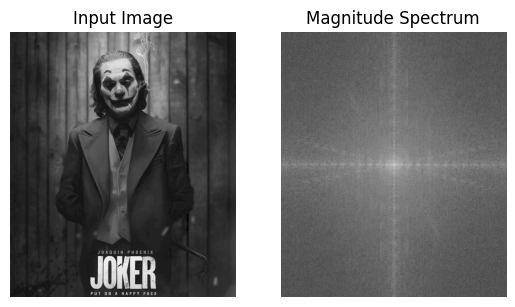

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('/content/[000085].png', 0)

# Compute Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Show original and Fourier-transformed image
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

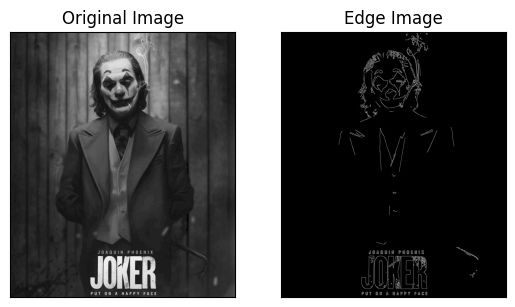

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load image in grayscale
img = cv.imread('/content/[000085].png', cv.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
assert img is not None, "file could not be read, check with os.path.exists()"

# Apply Canny edge detector
edges=cv.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks (()), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks ([]), plt.yticks([])
plt.show()

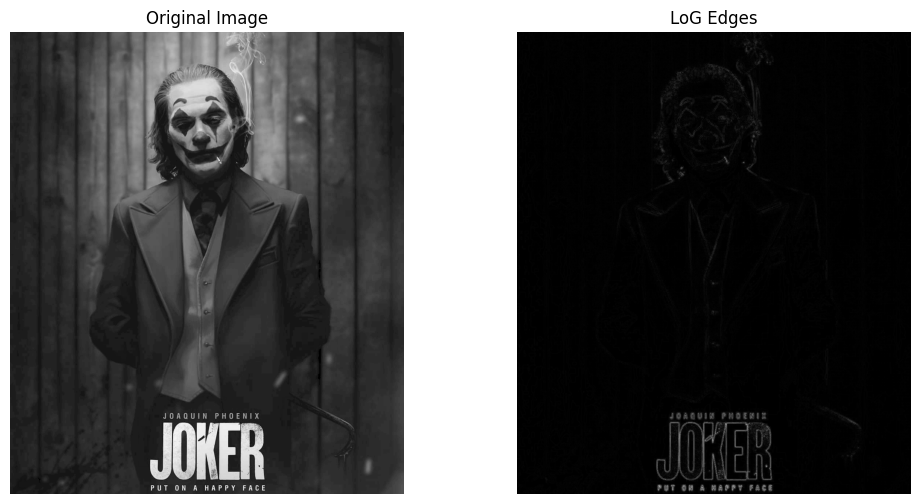

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/[000085].png', 0)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Apply GaussianBlur for noise reduction
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Apply Laplacian operator
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Convert the Laplacian result to uint8 for displaying
    laplacian_abs = np.uint8(np.absolute(laplacian))

    # Create a subplot with 1 row and 2 columns to display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 12x6 is the size of the figure

    # Show original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Turn off axis

    # Show Laplacian of Gaussian (LoG) result
    axes[1].imshow(laplacian_abs, cmap='gray')
    axes[1].set_title("LoG Edges")
    axes[1].axis('off')  # Turn off axis

    # Display both images
    plt.show()

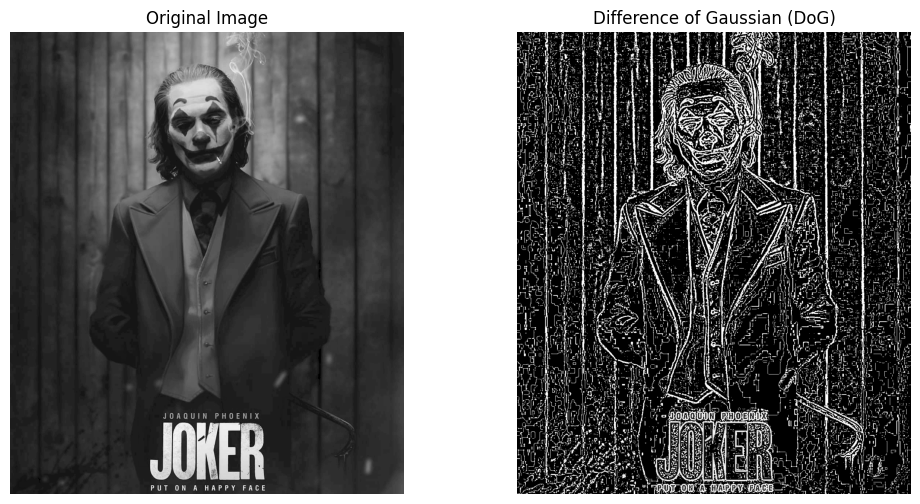

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/[000085].png', 0)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Apply two Gaussian blurs with different kernel sizes
    blur1 = cv2.GaussianBlur(image, (5, 5), 0)
    blur2 = cv2.GaussianBlur(image, (9, 9), 0)

    # Difference of Gaussian
    dog = blur1 - blur2

    # Normalize the DoG result for better visibility
    dog_normalized = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX)

    # Create a subplot with 1 row and 2 columns to display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Show original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')  # Turn off axis

    # Show Difference of Gaussian (DoG) image
    axes[1].imshow(dog_normalized, cmap='gray')
    axes[1].set_title("Difference of Gaussian (DoG)")
    axes[1].axis('off')  # Turn off axis

    # Display both images
    plt.show()